In [2]:
import numpy as np
import pandas as pd

#Visualize
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [3]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])
# train["datetime].dt.year (or month/day/hour/minute/second)
test = pd.read_csv("data/test.csv", parse_dates=["datetime"])
print(train.shape)
print(test.shape)
train.head(3)

(10886, 12)
(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [4]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day_date"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second

test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["hour"] = test["datetime"].dt.hour

train["day"] = train["datetime"].dt.dayofweek
test["day"] = test["datetime"].dt.dayofweek
test.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,day
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2,3


##  Visualize / Analyze

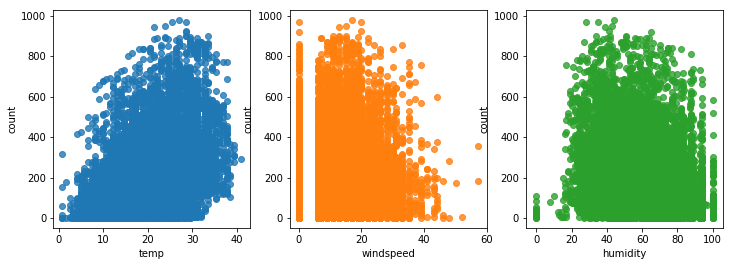

In [9]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 4)
sns.regplot(x="temp", y="count", data=train,ax=ax1, fit_reg=False)
sns.regplot(x="windspeed", y="count", data=train,ax=ax2, fit_reg=False)
sns.regplot(x="humidity", y="count", data=train,ax=ax3, fit_reg=False)

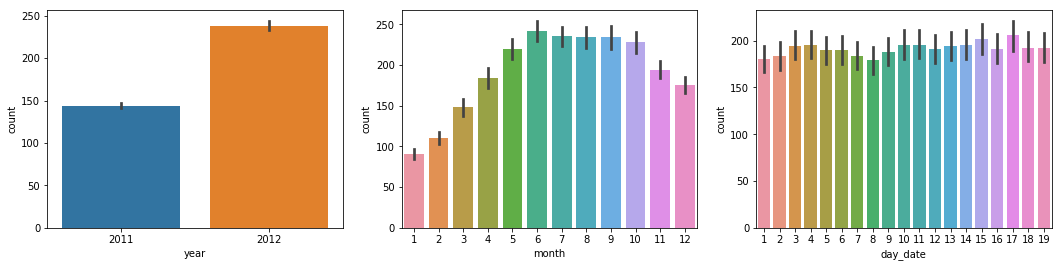

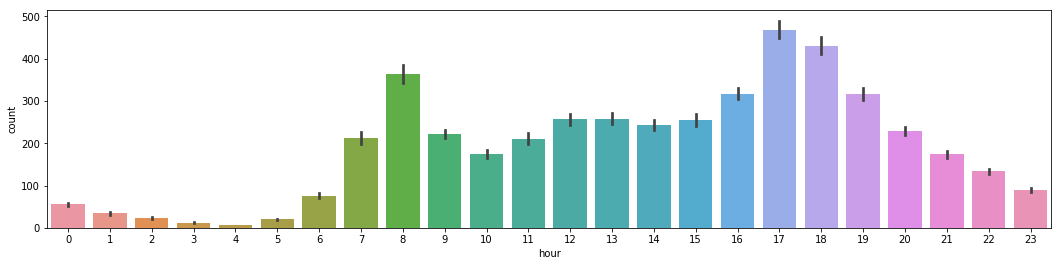

In [50]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day_date", y="count", ax=ax3)

figure, ax7 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="hour", y="count", ax=ax7)

In [52]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["datetime-year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "datetime-year_month"]].head()

(10886, 20)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


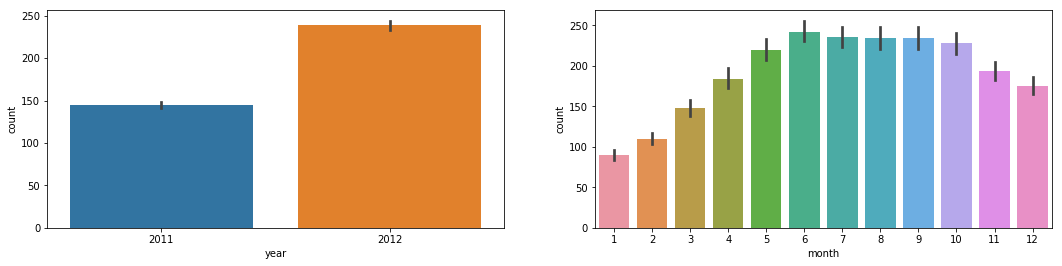

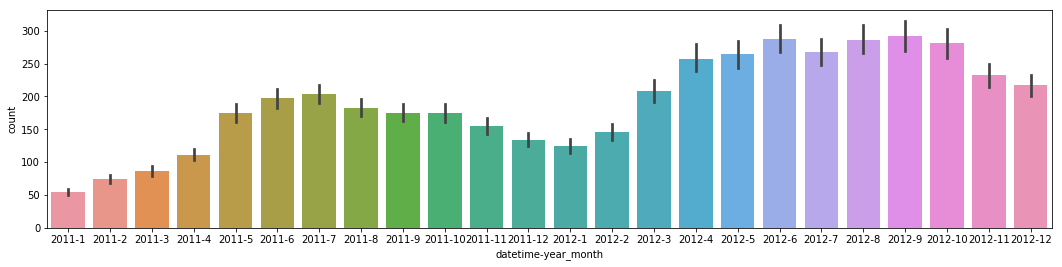

In [53]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)


figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

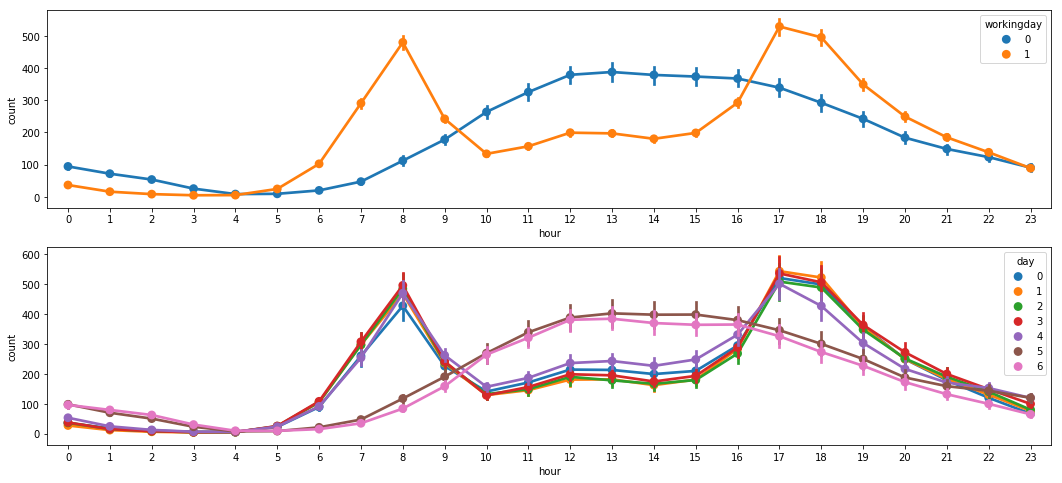

In [55]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="hour", y="count", hue="day", ax=ax2)

## one hot encoding

In [56]:
# one-hot encoding of season and weather did not improve the result

In [57]:
train["mon"] = train["day"] == 0
train["tue"] = train["day"] == 1
train["wed"] = train["day"] == 2
train["thu"] = train["day"] == 3
train["fri"] = train["day"] == 4
train["sat"] = train["day"] == 5
train["sun"] = train["day"] == 6

test["mon"] = test["day"] == 0
test["tue"] = test["day"] == 1
test["wed"] = test["day"] == 2
test["thu"] = test["day"] == 3
test["fri"] = test["day"] == 4
test["sat"] = test["day"] == 5
test["sun"] = test["day"] == 6

In [58]:
train["weekend"] = ((train["day"] == 5) | (train["day"] == 6))
test["weekend"] = ((test["day"] == 5) | (test["day"] == 6))

## hour

In [59]:
# workingday rush-hour
train["rushhour"] = (train["workingday"] == 1) & \
                    ((train["hour"] > 7) & (train["hour"] < 10) |\
                    (train["hour"] > 17) & (train["hour"] < 19))

test["rushhour"] = (test["workingday"] == 1) &\
                   ((test["hour"] > 7) & (test["hour"] < 10) |\
                   (test["hour"] > 17) & (test["hour"] < 19))

In [8]:
# non-workingday day-hour
train["dayhour"] = (train["workingday"] == 0) & \
                    ((train["hour"] > 8) & (train["hour"] < 20))
                     
test["dayhour"] = (test["workingday"] == 0) &\
                   ((test["hour"] > 8) & (test["hour"] < 20))

## season

In [9]:
train["NotWinter"] = (train["season"] != 4)
test["NotWinter"] = (test["season"] != 4)

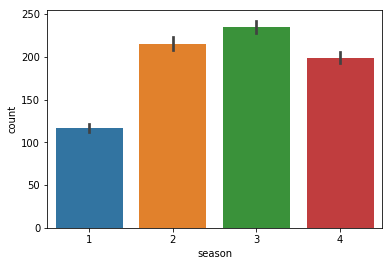

In [10]:
train.loc[train["weather"] == 4, "weather"] = 3   # since there are only 1 day with weather 4, so just change it to 3
test.loc[test["weather"] == 4, "weather"] = 3


sns.barplot(data=train, x="season", y="count")   # shows the mean of y

## windspeed

In [11]:
wind_valid = train[train["windspeed"] != 0]
wind_invalid = train[train["windspeed"] == 0]
wind_invalid_test = test[test["windspeed"] == 0]

features_names_wind = ["season", "holiday", "workingday", "weather",
                 "mon", "tue", "wed", "thu", "fri", "sat", "sun",
                  "temp", "atemp", "humidity",
                  "year", "hour"]

X_train = wind_valid[features_names_wind]
X_test = wind_invalid[features_names_wind]
X_test_test = wind_invalid_test[features_names_wind]

label_name = "windspeed"

y_train = wind_valid[label_name]

# train other features to predict windspeed on the days where they appeared to be "0" or misleading.
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 37)  # default random sample
model.fit(X_train, y_train)
model.predict(X_test)
predictions = model.predict(X_test)
train["wind_fillin"] = train["windspeed"]
train.loc[train["windspeed"] == 0, "wind_fillin"] = predictions

predictions = model.predict(X_test_test)
test["wind_fillin"] = test["windspeed"]
test.loc[test["windspeed"] == 0, "wind_fillin"] = predictions

## Train

In [12]:
feature_names = ["season","holiday", "workingday", "weather",
                 "mon", "tue", "wed", "thu", "fri", "sat", "sun",
                  "temp", "atemp", "humidity", "wind_fillin",
                 "year", "hour", "dayhour", "weekend", "rushhour"]

In [13]:
X_train = train[feature_names]
X_test = test[feature_names]

label_name_count = "count"    # for cross-val scoring
label_name_casual = "casual"
label_name_registered = "registered"

y_train_count = train[label_name_count]    # for cross-val scoring
y_train_casual = train[label_name_casual]
y_train_registered = train[label_name_registered]

## Tuning the Regressor

In [14]:
# import numpy as np
# from sklearn.metrics import make_scorer

# def rmsle(predict, actual):
#     predict = np.array(predict)
#     actual = np.array(actual)
    
# #     log_predict = np.log(predict + 1)
# #     log_actual = np.log(actual + 1)
#     log_predict = predict + 1
#     log_actual = actual + 1
    
#     difference = log_predict - log_actual
#     difference = np.square(difference)
    
#     mean_difference = difference.mean()
    
#     score = np.sqrt(mean_difference)
    
#     return score

# rmsle_scorer = make_scorer(rmsle)
# rmsle_scorer

make_scorer(rmsle)

In [16]:
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.cross_validation import cross_val_score

# hyperparameters_list = []

# n_estimators = 300
# num_epoch = 100

# for epoch in range(num_epoch):
#     max_depth = np.random.randint(low=10, high=70)
#     max_features = np.random.uniform(low=0.4, high=1.0)

#     model = RandomForestRegressor(n_estimators=n_estimators,
#                                   max_depth=max_depth,
#                                   max_features=max_features,
#                                   random_state=37,
#                                   n_jobs=-1)

#     score = cross_val_score(model, X_train, y_train_count, cv=20, \
#                             scoring=rmsle_scorer).mean()

#     hyperparameters_list.append({
#         'score': score,
#         'n_estimators': n_estimators,
#         'max_depth': max_depth,
#         'max_features': max_features,
#     })

#     print("Score = {0:.5f}".format(score))

# hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
# hyperparameters_list = hyperparameters_list.sort_values(by="score")

# print(hyperparameters_list.shape)
# hyperparameters_list.head()

## Predict

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=50, 
                              max_depth=83,
                              max_features=0.851358,
                              random_state = 37)   # default random sample

y_train_casual = np.log(y_train_casual + 1)
y_train_registered = np.log(y_train_registered + 1)

model.fit(X_train, y_train_casual)
prediction_casual = model.predict(X_test)

model.fit(X_train, y_train_registered)
prediction_registered = model.predict(X_test)

prediction_casual = np.exp(prediction_casual) - 1
prediction_registered = np.exp(prediction_registered) - 1

prediction = prediction_casual + prediction_registered   # total = casual + registered

model.fit(X_train, y_train_count)    # for cross-val scoring

## Score (Cross Validation)

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, X_train, y_train_count, cv = 20, scoring="neg_mean_absolute_error").mean()
##neg_mean_absolute_error = |p-a|
score = score * -1
print("Score = {0:.5f}".format(score))

## Submit

In [ ]:
submission = pd.read_csv("data/sampleSubmission.csv")  # or , index_col="datetime") 
submission["count"] = prediction
submission.to_csv("submission.csv", index=False)   # <- this 